<a href="https://colab.research.google.com/github/yhw991228/Capstone_Design_2021_1/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from google.colab import drive

In [ ]:
import sys
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import optimizers
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
import os
from pandas import Series, DataFrame
from keras.layers import BatchNormalization, Dropout

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv

In [ ]:
spot_data_path="/content/drive/Shareddrives/산수프 여러분 힘내요 사랑해요/data/refinedata/preprocessing_original-utf8.csv"
rain_data_path="/content/drive/Shareddrives/산수프 여러분 힘내요 사랑해요/data/refinedata/preprocessing_rain_spot-utf8.csv"
temp_data_path="/content/drive/Shareddrives/산수프 여러분 힘내요 사랑해요/data/refinedata/preprocessing_temp_spot-utf8.csv"

In [ ]:
rain_spot= pd.read_csv(rain_data_path)
temp_spot= pd.read_csv(temp_data_path)
spot_data= pd.read_csv(spot_data_path)

In [ ]:
rain_spot_list=rain_spot.values
temp_spot_list=temp_spot.values
spot_data_list=spot_data.values

In [ ]:
spot_data_2020_path="/content/drive/Shareddrives/산수프 여러분 힘내요 사랑해요/data/refinedata/2020_preprocessing_original.csv"
rain_data_2020_path="/content/drive/Shareddrives/산수프 여러분 힘내요 사랑해요/data/refinedata/2020_preprocessing_rain.csv"
temp_data_2020_path="/content/drive/Shareddrives/산수프 여러분 힘내요 사랑해요/data/refinedata/2020_preprocessing_temp.csv"

In [ ]:
spot_2020=pd.read_csv(spot_data_2020_path)
rain_2020=pd.read_csv(rain_data_2020_path)
temp_2020=pd.read_csv(temp_data_2020_path)
spot_2020_list=spot_2020.values
rain_2020_list=rain_2020.values
temp_2020_list=temp_2020.values

In [ ]:
print(len(spot_2020_list),len(rain_2020_list),len(temp_2020_list))
print(rain_2020.shape,spot_2020.shape,temp_2020.shape,rain_spot.shape)

121 121 121
(121, 367) (121, 367) (121, 367) (112, 366)


In [ ]:
input_data=np.array([])
for i in range(0,rain_spot.shape[0]):
    for j in range(1,rain_spot.shape[1]):
        a=[i,rain_spot_list[i][j],temp_spot_list[i][j]] #장소 i , 시간에 맞춘 강수량, 온도
        arr = np.array(a)
        input_data=np.append(input_data,arr)

input_data=input_data.reshape(rain_spot.shape[0]*(rain_spot.shape[1]-1),3,1,1)

In [ ]:
output_data=np.array([])
for i in range(0,rain_spot.shape[0]):
    for j in range(1,rain_spot.shape[1]):
        a=[spot_data_list[i][j]]
        arr=np.array(a)
        output_data=np.append(output_data,arr)

output_data=output_data.reshape(rain_spot.shape[0]*(rain_spot.shape[1]-1),1)

In [ ]:
space=[]
index=-1
for i in range(112):
  space.append(temp_spot_list[i][0])
alt=112

In [ ]:
input_2020_data=np.array([])

for i in range(0,spot_2020.shape[0]):
  if spot_2020['Unnamed: 0'][i] in space:
    index=space.index(spot_2020['Unnamed: 0'][i])
  else:
    index=alt
    alt+=1
  for j in range(1,spot_2020.shape[1]):
       a=[index,rain_2020_list[i][j],temp_2020_list[i][j]] #장소 i , 시간에 맞춘 강수량, 온도
       arr = np.array(a)
       input_2020_data=np.append(input_2020_data,arr)
print(type(input_2020_data),spot_2020.shape,input_2020_data.shape)
input_2020_data=input_2020_data.reshape(121*366,3,1,1)

<class 'numpy.ndarray'> (121, 367) (132858,)


In [ ]:
output_2020_data=np.array([])
for i in range(0,spot_2020.shape[0]):
  for j in range(1,spot_2020.shape[1]):
        a=[spot_2020_list[i][j]]
        arr=np.array(a)
        output_2020_data=np.append(output_2020_data,arr)

output_2020_data=output_2020_data.reshape(121*366,1)

In [ ]:
x_train=input_data
y_train=output_data
x_test=input_2020_data
y_test=output_2020_data
img_rows=3
img_cols=1

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(40880, 3, 1, 1) (40880, 1) (44286, 3, 1, 1) (44286, 1)


In [ ]:
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')/(x_train.max()-x_train.min()) #min max찾아서 0과 1 사이 값으로 만들어 놓기
x_test = x_test.astype('float32')/(x_test.max()-x_train.min())
x_test.max()

1.0

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (40880, 3, 1, 1)
40880 train samples
44286 test samples


In [ ]:
num_classes=2

In [ ]:
import tensorflow as tf

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes) 
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
num_classes = 2

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 64

epochs = 128

model = Sequential()
model.add(Conv2D(32, (3, 1), padding='valid', input_shape=(3, 1, 1), activation='relu')) # 이게 kernel 돌려가면서 학습하는 효과가 과연 있을까..? convolution 연산하는 의미가 있나..? 
model.add(MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))

model.add(Conv2D(64, (2, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1,1)))

model.add(Conv2D(128, (1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1,1)))


model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.125))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


x_train shape: (40880, 3, 1, 1)
40880 train samples
44286 test samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 1, 32)          128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 64)          4160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 128)         8320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
___________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(len(x_train),len(y_train))

40880 40880


In [ ]:

hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/128
639/639 [==============================] - 18s 3ms/step - loss: 0.4401 - accuracy: 0.7866
Epoch 2/128
639/639 [==============================] - 2s 3ms/step - loss: 0.3605 - accuracy: 0.8489
Epoch 3/128
639/639 [==============================] - 2s 3ms/step - loss: 0.3478 - accuracy: 0.8555
Epoch 4/128
639/639 [==============================] - 2s 3ms/step - loss: 0.3460 - accuracy: 0.8563
Epoch 5/128
639/639 [==============================] - 2s 3ms/step - loss: 0.3376 - accuracy: 0.8563
Epoch 6/128
639/639 [==============================] - 2s 3ms/step - loss: 0.3465 - accuracy: 0.8578
Epoch 7/128
639/639 [==============================] - 2s 3ms/step - loss: 0.3403 - accuracy: 0.8617
Epoch 8/128
639/639 [==============================] - 2s 3ms/step - loss: 0.3500 - accuracy: 0.8549
Epoch 9/128
639/639 [==============================] - 2s 3ms/step - loss: 0.3429 - accuracy: 0.8567
Epoch 10/128
639/639 [==============================] - 2s 3ms/step - loss: 0.3386 - accur

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
hist.history

{'accuracy': [0.8310909867286682,
  0.8526418805122375,
  0.8559442162513733,
  0.8563600778579712,
  0.8551614284515381,
  0.857191801071167,
  0.8606164455413818,
  0.8548189997673035,
  0.8572406768798828,
  0.8588062524795532,
  0.860322892665863,
  0.8590264320373535,
  0.8565068244934082,
  0.8617416620254517,
  0.8565313220024109,
  0.8620597124099731,
  0.8593688607215881,
  0.8610323071479797,
  0.8604452013969421,
  0.8611056804656982,
  0.8592954874038696,
  0.8526418805122375,
  0.8608365654945374,
  0.8615704774856567,
  0.8615949153900146,
  0.8623777031898499,
  0.8602495193481445,
  0.8609344363212585,
  0.8620597124099731,
  0.8586595058441162,
  0.8604452013969421,
  0.8555283546447754,
  0.859784722328186,
  0.8625978231430054,
  0.8630136847496033,
  0.8570449948310852,
  0.850807249546051,
  0.857338547706604,
  0.8546966910362244,
  0.8602005839347839,
  0.8605919480323792,
  0.8611056804656982,
  0.8560910224914551,
  0.8611301183700562,
  0.8618639707565308,
  0

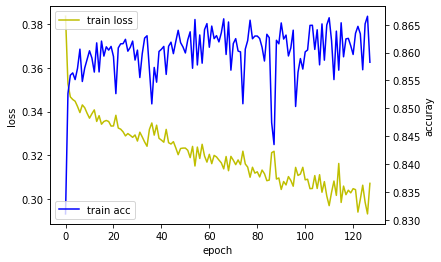

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()